## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [ ]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 7.34MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv('titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [ ]:
data_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
import numpy as np

**Data engineering**

**Find NaN values and replace with median**

In [ ]:
# Clean up panda DataFrames + Data imputation
# Approach 1: If age is Nan dicard that row -> lead to accuracy of ~74%
#data_x_cleaned = data_x.dropna(subset=['Age'])
# Approach 2: Replace missing 'Age' values with median value -> leads to accuracy of ~81%
#data_x_cleaned = data_x.fillna({'Age': data_x['Age'].median()})
#Approach 3: Replace missing 'Age' values with max value -> leads to accuracy of ~82%
data_x_cleaned = data_x.fillna({'Age': data_x['Age'].max()})
data_y_cleaned = data_y.loc[data_x_cleaned.index]

print(data_x_cleaned.shape)
print(data_y_cleaned.shape[0])

print(data_x_cleaned.head())

(891, 11)
891
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


**One-hot encoding for categorical variables and create testing and training sets**



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data manipulation

# One-hot encoding - define dtype because otherwise set True/False
sex_encoded = pd.get_dummies(data_x_cleaned['Sex'], prefix='Sex', dtype = int)
embarked_encoded = pd.get_dummies(data_x_cleaned['Embarked'], prefix='Embarked', dtype = int)

# Drop original categorical columns and concatenate encoded ones
features_encoded = data_x_cleaned.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare'], axis=1)
features_encoded = pd.concat([features_encoded, sex_encoded, embarked_encoded], axis=1)
#features_encoded = pd.concat([features_encoded, sex_encoded], axis = 1)

# Convert to NumPy arrays
X = features_encoded.values
y = data_y_cleaned.values

print(features_encoded.head())
#print(y)

# Standardize features (excluding one-hot encoded columns to keep binary values)
scaler = StandardScaler()
X[:, :2] = scaler.fit_transform(X[:, :2])  # Assuming first two columns are numerical and need scaling

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       3  22.0      1      0           0         1           0           0   
1       1  38.0      1      0           1         0           1           0   
2       3  26.0      0      0           1         0           0           0   
3       1  35.0      1      0           1         0           0           0   
4       3  35.0      0      0           0         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


**Loss function and gradient descent functions**

In [ ]:
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-z))

def crossentropy(y, y_pred):
  cost = np.mean(- y * (np.log(y_pred)) - (1-y) * (np.log(1-y_pred)))
  return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
#print(f'Current X shape: {X_train.shape}')
#intercept_col = np.ones(X_train.shape[0])  # a column of 1's for intercept value
#points = np.column_stack((X_train, intercept_col))
#print(f'New X shape: {X_train.shape}. Extra col added for intercept value')

#print(f'Current X shape: {X_train.shape}')
#intercept_col = np.ones(X_train.shape[0])  # a column of 1's for intercept value
#X_train = np.column_stack((X_train, intercept_col))
#print(f'New X shape: {X_train.shape}. Extra col added for intercept value')

**Train logistic regression model**

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(712, 9)
(9,)


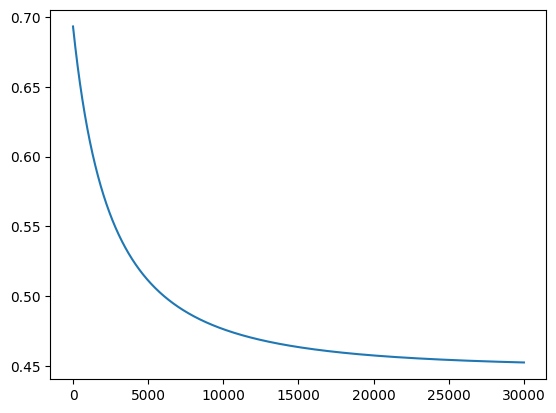

In [ ]:
num_iters = 30_000 #40_000
lr = 1e-3 # 0.01

theta = np.zeros(X_train.shape[1])

losses = []

print(type(X_test))
print(type(theta))
print(X_train.shape)
print(theta.shape)

for _ in range(num_iters):
  z = X_train @ theta
  y_pred = sigmoid(z)
  loss = crossentropy(y_train, y_pred)

  gradient = np.dot(X_train.T, (y_pred-y_train)) / X_train.shape[0]

  theta = theta - lr*gradient

  losses.append(loss)

plt.plot(losses)

**Theta parameters**

In [ ]:
theta

array([-0.71058098, -0.33440792, -0.2075962 , -0.00901761,  1.15024633,
       -1.17912798,  0.17962666,  0.10058413, -0.32528585])

# Comment

Theta coefficients here suggest that the 5th and 6th features have the greatest impact on surviving. These features correspond to 'female' and 'male' features. Therefore this could indicate that women were more likely to survive comparing to men because of the negative sign that is attached to the weight corresponding to men's weight.

**Calculate prediction**

In [ ]:
z = X_test @ theta
y_pred = sigmoid(z)
y_pred = np.round(y_pred)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1.])

**Accuracy**

In [ ]:
correct_preds = y_test == y_pred
accuracy = np.sum(correct_preds) / len(correct_preds)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8156424581005587


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 14],
       [19, 55]])

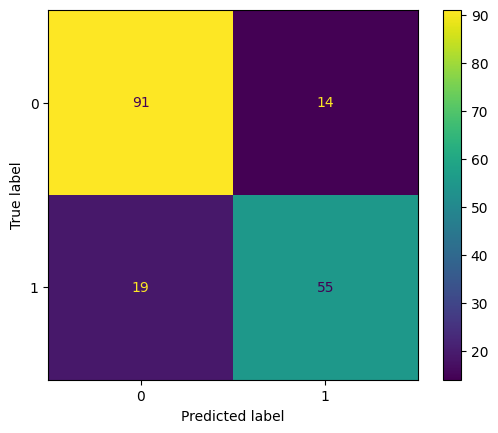

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

**Comment**

Initially data with missing values at 'Age' feature were discarded resulting in an accuracy of approximately 74%. By updating those missing values with the median value of that feature the accuracy of the model increased to 81%. A slightly better accuracy is also achieved if the maximum value of the 'Age' feature is used for the missing values, reaching almost 82% accuracy.